In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
from normalize_data import getNormalizedDataset

In [5]:
df = getNormalizedDataset()

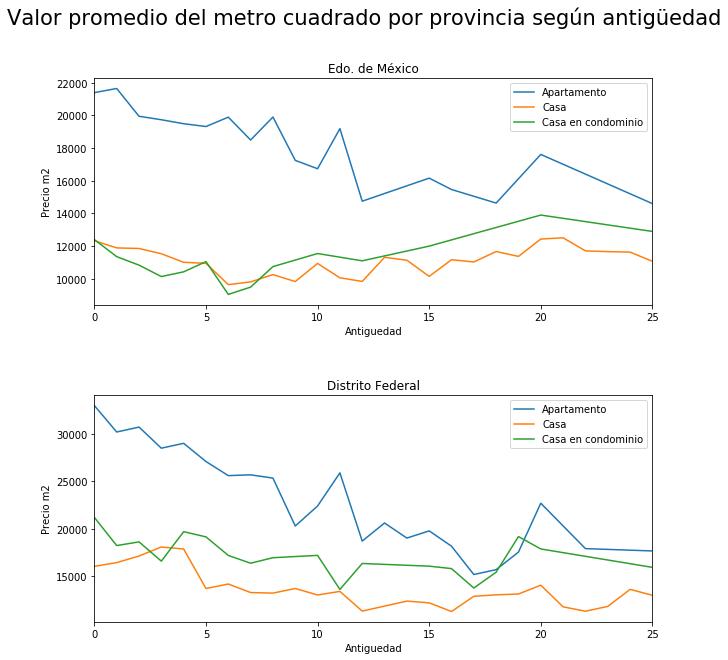

In [6]:
# Influye la antiguedad en el valor de las casas?
# Tomo datos agrupando por antiguedad, tipo de propiedad y provincia. 
# Filtro aquellos grupos donde la cantidad no es suficiente como para hacer un analisis consistente
# Armo un grafico para cada provincia, comparando los tipos de propiedad

df2 = df.copy()

df2 = df2[df2['extras']==2]

df2 = df2.groupby(['antiguedad','tipodepropiedad','provincia']).filter(lambda x: len(x)>10).groupby(['antiguedad','tipodepropiedad','provincia']).agg({'precio_m2':'mean'})

df2 = df2.reset_index()

df2.dropna(subset=['precio_m2'], inplace=True)

fig,(ax1,ax2) = plt.subplots(2,1, figsize=(10,10))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado por provincia según antigüedad',fontsize=21)

for name in ['Apartamento','Casa', 'Casa en condominio']:
    
    ax1.plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Edo. de México')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Edo. de México')].precio_m2,\
            label=name)
    ax1.set_title('Edo. de México')

    ax2.plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Distrito Federal')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Distrito Federal')].precio_m2,\
            label=name)
    ax2.set_title('Distrito Federal')

    ax1.set_xlim([0,25])
    ax2.set_xlim([0,25])

    
ax1.set_xlabel("Antiguedad")
ax1.set_ylabel("Precio m2")
ax1.legend(loc='best')
ax2.set_xlabel("Antiguedad")
ax2.set_ylabel("Precio m2")
ax2.legend(loc='best')


In [7]:
# Del grafico anterior, se puede observar:
# En ambas ciudades, los precios de los apartamentos van disminuyendo, a la vez que aumenta la antiguedad
# En el caso de las casas, los precios parecen no verse afectados por la antiguedad, pudiendo tener menos o mas valor
# La diferencia de precios, parece verse mas evidente a partir de los 10 años de antiguedad, no asi en los primeros 5.
# No es un dato menor que vaya disminuyendo pero a la vez siga habiendo picos. Si bien es un dato que influye,
# pueden existir casas mas antiguas de mayor valor.

In [8]:
# Caracteristicas principales de agrupar por habitaciones
# Las casas de mas habitaciones, son mucho mas viejas
# No es algo muy importante, pero es un dato curioso
df.groupby('habitaciones').mean()

,antiguedad,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_dolar,precio_m2,extras
habitaciones,,,,,,,,,,,,,,
0.00,0.00,0.00,0.00,40.00,40.00,0.00,0.00,0.00,0.00,0.00,500000.00,25588.54,12500.00,0.00
1.00,6.05,0.76,1.19,84.89,116.23,0.11,0.07,0.12,0.38,0.36,1680159.58,85985.65,20078.25,1.06
1.20,3.81,0.53,1.41,228.40,255.47,0.00,0.00,0.00,0.26,0.28,2098470.47,107393.58,12314.92,0.53
1.33,11.59,0.23,1.56,80.45,93.14,0.00,0.00,0.00,0.23,0.36,1656184.55,84758.68,28033.03,0.23
1.44,0.20,0.01,1.37,21.05,289.67,0.00,0.00,0.05,0.32,0.18,1039581.92,53202.76,10713.58,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.00,13.90,0.84,2.62,270.51,285.86,0.01,0.01,0.03,0.42,0.34,2626539.20,134418.59,9897.65,0.89
8.25,21.00,0.80,2.90,303.80,307.00,0.00,0.00,0.00,0.40,0.40,3970000.00,203172.98,13476.04,0.80
9.00,15.10,0.85,2.46,277.85,294.61,0.01,0.02,0.01,0.40,0.37,2557393.56,130879.92,9639.35,0.90


In [9]:
# Cantidad de tipos de propiedades
df.tipodepropiedad.value_counts()

Casa                             129110
Apartamento                       53594
Casa en condominio                17719
Terreno                            9011
Local Comercial                    2570
Oficina comercial                  1555
Terreno comercial                  1190
Bodega comercial                   1046
Edificio                            686
Casa uso de suelo                   576
Quinta Vacacional                   372
Villa                               316
Duplex                              295
Rancho                              166
Inmuebles productivos urbanos       156
Local en centro comercial           148
Departamento Compartido             131
Otros                                82
Nave industrial                      61
Terreno industrial                   21
Huerta                               20
Hospedaje                             1
Garage                                1
Lote                                  0
Name: tipodepropiedad, dtype: int64

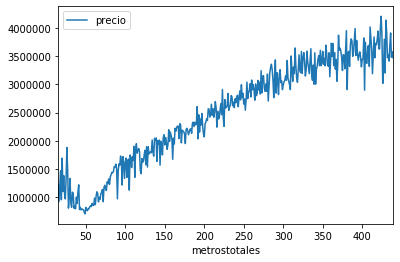

In [10]:
# Grafico muy sencillo como para ver como aumentan en conjunto precio y metrostotales
df.groupby('metrostotales').agg({'precio':'mean'}).plot()

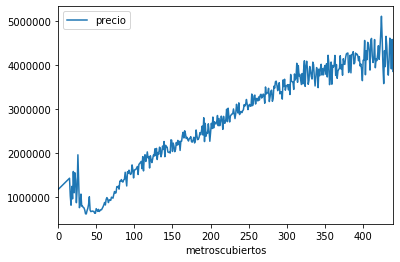

In [11]:
df.groupby('metroscubiertos').agg({'precio':'mean'}).plot()

In [12]:
# Valor de metro cuadrado por provincia y ciudad.
# Se podria hacer mucho mejor esto
df3 = df[df.piscina==0]
df3 = df[df.gimnasio==0]
df3 = df[df.antiguedad<5]
m2_x_zona = df3.groupby(['provincia','ciudad']).agg({'precio_m2':'mean'})
m2_x_zona

precio_m2
provincia      ciudad                            
Aguascalientes Abalá                          nan
               Abasolo                        nan
               Acajete                        nan
               Acambay                        nan
               Acapulco de Juárez             nan
...                                           ...
Zacatecas      San Luis de la Paz             nan
               San Matías Tlalancaleca        nan
               San Pedro                      nan
               Sombrerete                     nan
               ZirAndaro                      nan

[28000 rows x 1 columns]

In [13]:
# Provincias mas grandes
df.groupby(['ciudad']).size().sort_values()[-10:]

ciudad
Atizapán de Zaragoza     5033
Alvaro Obregón           5231
Naucalpan de Juárez      5464
Cuauhtémoc               5820
Monterrey                6178
Mérida                   6832
San Luis Potosí          7163
Zapopan                  9490
Benito Juárez           10058
Querétaro               12116
dtype: int64

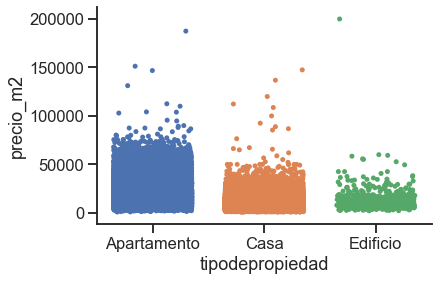

In [14]:
sns.set(style='ticks', context='talk')

sns.stripplot(x='tipodepropiedad', y='precio_m2', data=df, order=['Apartamento','Casa','Edificio'], jitter=0.35)
sns.despine()

In [15]:
df.shape

(218827, 21)